In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline #импорт библиотек и магии (ノ°∀°)ノ⌒･*:.｡. .｡.:*･゜ﾟ･*☆	 

0.0
208.739619933
257.227391263
229.446606794
173.567826476
115.102121874
65.7863480141
29.4410794494
5.71689098284
-7.60382497921
-13.2760748318
-13.930386812
-11.8808538007
-8.88051127007
-5.78886583767
-3.03575115175
-0.889600272917
0.56296301986
1.37469286539
1.67298709565
1.60974538597
1.32945259425
0.951908914639
0.565451072136
0.227070259289


'Чем дальше от 0, тем больше расхождение, если брать количество точек между начальным и конечным значениеями для функции Лагранжа больше, чем для введенной функции.'

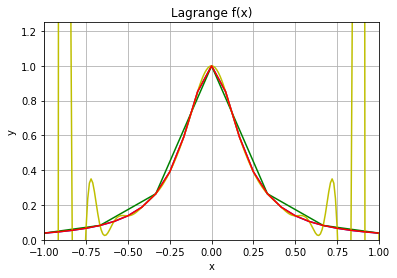

In [79]:
"""Полином Лагранжа"""
def lagrange_k(xval, xk, k): #def функция для Лагранжиана
    n = len (xk)
    up = 1.0
    down = 1.0
    for j in range (n):
        if j==k:
            continue 
        up *= (xval - xk[j])
        down *= (xk[k]- xk[j])
    return up/down  

def lagrange(xval, xk, yk):  #def собственно, сам Лагранжиан
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))

xk = np.linspace(-1, 1, 25) #обозначим функцию (начальное знач., конечное знач., кол-во точек между)"""Для менее угловатого вида лучше задавать большое количество точек. Я для удобства использую 25"""
yk = [1.0/(1.0+25.0*xk**2.0) for xk in xk]

xx = np.linspace(-1, 1, 201) #для Лагранжиана (так же)
yy = [lagrange(il, xk, yk) for il in xx]

x1 = np.linspace(-1, 1, 25) 
y1 = [lagrange(il, xk, yk) for il in x1]

x2 = np.linspace(-1, 1, 7) 
y2 = [lagrange(il, xk, yk) for il in x2]

"""Чем больше кол-во точек между начальным и конечным значениями, тем плавнее график.Если эти значения в функции и Лагранжиане совпадают, то графики накладываются."""

plt.grid(True) #Сетка
plt.plot (x1, y1, 'b-') #равное кол-ву в функции
plt.plot (x2, y2, 'g-') #наименьшее кол-во точек
plt.plot (xx, yy, 'y-') #наибольшее кол-во точек
plt.plot (xk, yk, 'r-') #Функция - красный

plt.axis( [ -1, 1, 0, 1.25 ] ) #(xmin, xmax, ymin, ymax)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Lagrange f(x)')

for yf, yl in zip (yk, yy): #проверяю значения в узлах дальше от 0
    print (yf - yl) 
    
"""Чем дальше от 0, тем больше расхождение, если брать количество точек между начальными конечным значениеями для функции Лагранжа больше, чем для введенной функции."""

-7.07649635279e-08
2.07091237681
2.67605372642
2.5105756701
2.00958253485
1.43053690215
0.913741194942
0.526433864438
0.295125017402
0.229383769942
0.333209427808
0.568443656965
0.734789437732
0.629963325125
0.420296270166
0.271017816631
0.188018434888
0.141899109829
0.112099212886
0.08815322683
0.0656509854578
0.0433482759978
0.021492489632
0.000888190767797
-0.0176100695417


'Полином Чебышева подстраивается лучше, и расхождение меньше, но для этого нужна \nстепень побольше (красиво выходит уже при 21). При маленьких степенях полином как \nбы "лежит под" графиком функции.'

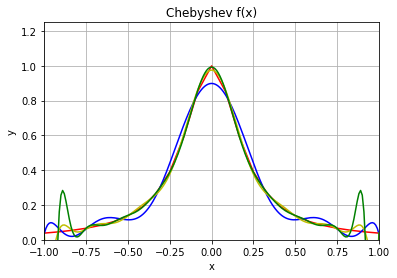

In [67]:
"""Чебышев"""
q = np.linspace(-1, 1, 25)
r = [1.0/(1.0+25.0*i**2.0) for i in q] 

t = np.linspace(-1, 1, 201)
p = np.polynomial.Chebyshev.fit(q, r, 21) #(х, у, степень Чебышевского полинома)
p1 = np.polynomial.Chebyshev.fit(q, r, 10)
p2 = np.polynomial.Chebyshev.fit(q, r, 17)

plt.plot(q, r, 'r-') #функция - красный
plt.plot(t, p1(t), 'b-') #наименьшая степень
plt.plot(t, p2(t), 'y-') # средняя степень
plt.plot(t, p(t), 'g-') #оптимальная степень

"""Стиль"""
plt.axis( [ -1, 1, 0, 1.25 ] )
plt.grid(True)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Chebyshev f(x)')

for m, w in zip(r, p(t)): #проверяю значения в узлах при 21 степени
    print (m - w)
    
"""Полином Чебышева подстраивается лучше, и расхождение меньше, но для этого нужна 
степень побольше (красиво выходит уже при 21). При маленьких степенях полином как 
бы "лежит под" графиком функции."""

0.0
0.00622364411668
0.0144716916242
0.0256031145154
0.0409638664655
0.0627396502712
0.0946177468269
0.143049892176
0.219578942143
0.344167316119
0.54310737935
0.804002827372
0.950887211204
0.801879288022
0.538857636515
0.337786041528
0.211058143391
0.132378906997
0.0817828996814
0.0477237200449
0.0237460406826
0.00615898933811
-0.00722672814735
-0.017760656811
-0.0263053600075


'Сплайн выглядит лучше всех, да и различия между значениями функций кране мало.'

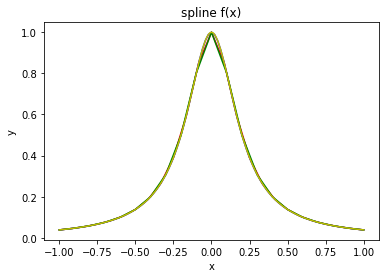

In [81]:
"""Сплайн"""
xv = np.linspace(-1, 1, 25) #обозначим функцию (начальное знач., конечное знач., кол-во точек между)
yv = [1.0/(1.0+25.0*xv**2.0) for xv in xv]

from scipy.interpolate import CubicSpline as cs
spl = cs(xv, yv)

xc = np.linspace(-1, 1, 201)
yc = spl(xc)

xc1 = np.linspace(-1, 1, 101)
yc1 = spl(xc1)

xc2 = np.linspace(-1, 1, 21)
yc2 = spl(xc2)

plt.plot (xv, yv, 'r-') #функция - красный
plt.plot (xc1, yc1, 'b-') #среднее кол-во точек
plt.plot (xc2, yc2, 'g-') #наименьшее кол-во точек
plt.plot (xc, yc, 'y-') #наибольшее кол-во точек

"""Стиль"""
plt.ylabel('y')
plt.xlabel('x')
plt.title('spline f(x)')

for v, u in zip(yv, yc): #проверяю значения в узлах 
    print (v - u)
    
"""Сплайн выглядит лучше всех, да и различия между значениями функций кране мало."""